In [1]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
#Import request
import requests
#Import weather API Key.
from config import weather_api_key

In [7]:
#Starting URL for Weather map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i %50==0 and i>=50):
        set_count +=1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url+ "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | banda aceh
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | toktogul
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | buraydah
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | ardesen
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | gamba
Processing Record 21 of Set 1 | cotonou
Processing Record 22 of Set 1 

Processing Record 41 of Set 4 | burkhala
City not found. Skipping...
Processing Record 42 of Set 4 | barcelos
Processing Record 43 of Set 4 | florida
Processing Record 44 of Set 4 | ulladulla
Processing Record 45 of Set 4 | amderma
City not found. Skipping...
Processing Record 46 of Set 4 | mafinga
Processing Record 47 of Set 4 | chicama
Processing Record 48 of Set 4 | pionerskiy
Processing Record 49 of Set 4 | nalut
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | ndiekro
City not found. Skipping...
Processing Record 2 of Set 5 | dien bien
City not found. Skipping...
Processing Record 3 of Set 5 | wakkanai
Processing Record 4 of Set 5 | hunza
City not found. Skipping...
Processing Record 5 of Set 5 | batagay-alyta
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | pirawa
Processing Record 10 of Set 5 | kapaa
Processing Reco

Processing Record 26 of Set 8 | puerto escondido
Processing Record 27 of Set 8 | mayo
Processing Record 28 of Set 8 | los angeles
Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | clifton
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | lira
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | shizuishan
Processing Record 35 of Set 8 | salvador
Processing Record 36 of Set 8 | along
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | wanning
Processing Record 39 of Set 8 | langsa
Processing Record 40 of Set 8 | galveston
Processing Record 41 of Set 8 | zeya
Processing Record 42 of Set 8 | lengshuijiang
Processing Record 43 of Set 8 | kupang
Processing Record 44 of Set 8 | iqaluit
Processing Record 45 of Set 8 | paveh
Processing Record 46 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 47 of Set 8 | partizanskoye
Processing Record 48 of Set 8 | tanout
Processing Record 49 of Set 8

Processing Record 16 of Set 12 | la ronge
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | camapua
Processing Record 19 of Set 12 | volchansk
Processing Record 20 of Set 12 | charcas
Processing Record 21 of Set 12 | sussex
Processing Record 22 of Set 12 | abu kamal
Processing Record 23 of Set 12 | kalmunai
Processing Record 24 of Set 12 | tabou
Processing Record 25 of Set 12 | safonovo
Processing Record 26 of Set 12 | port lincoln
Processing Record 27 of Set 12 | pangody
Processing Record 28 of Set 12 | cape canaveral
Processing Record 29 of Set 12 | muravlenko
Processing Record 30 of Set 12 | sanary-sur-mer
Processing Record 31 of Set 12 | praia
Processing Record 32 of Set 12 | tabuny
Processing Record 33 of Set 12 | plettenberg bay
Processing Record 34 of Set 12 | jinan
Processing Record 35 of Set 12 | astros
Processing Record 36 of Set 12 | khonuu
City not found. Skipping...
Processing Record 37 of Set 12 | espanola
Processing Record 38 of Set 12 | mac

In [10]:
len(city_data)

546

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Banda Aceh,5.5577,95.3222,80.51,77,18,2.98,ID,2021-04-08 15:21:44
1,Castro,-24.7911,-50.0119,71.02,63,38,10.89,BR,2021-04-08 15:21:45
2,Punta Arenas,-53.1500,-70.9167,44.60,70,75,19.57,CL,2021-04-08 15:21:45
3,Victoria,22.2855,114.1577,73.99,78,100,4.00,HK,2021-04-08 15:20:45
4,Fortuna,40.5982,-124.1573,46.00,81,20,3.44,US,2021-04-08 15:21:46
5,Hithadhoo,-0.6000,73.0833,83.89,66,24,14.99,MV,2021-04-08 15:21:46
6,Busselton,-33.6500,115.3333,54.00,86,0,1.01,AU,2021-04-08 15:21:46
7,Toktogul,41.8708,72.9402,50.07,56,15,3.49,KG,2021-04-08 15:21:47
8,Puerto Ayora,-0.7393,-90.3518,82.40,74,0,6.91,EC,2021-04-08 15:17:41
9,Jamestown,42.0970,-79.2353,72.00,46,1,9.22,US,2021-04-08 15:21:47


In [12]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Banda Aceh,ID,2021-04-08 15:21:44,5.5577,95.3222,80.51,77,18,2.98
1,Castro,BR,2021-04-08 15:21:45,-24.7911,-50.0119,71.02,63,38,10.89
2,Punta Arenas,CL,2021-04-08 15:21:45,-53.1500,-70.9167,44.60,70,75,19.57
3,Victoria,HK,2021-04-08 15:20:45,22.2855,114.1577,73.99,78,100,4.00
4,Fortuna,US,2021-04-08 15:21:46,40.5982,-124.1573,46.00,81,20,3.44
...,...,...,...,...,...,...,...,...,...
541,Westport,US,2021-04-08 15:24:54,41.1415,-73.3579,64.00,62,1,9.22
542,Monmouth,US,2021-04-08 15:21:15,40.3001,-74.1663,62.01,55,1,6.91
543,Novyy Khushet,RU,2021-04-08 15:24:54,42.8994,47.5604,50.00,93,5,11.18
544,Portland,US,2021-04-08 15:23:22,45.5234,-122.6762,44.60,70,75,9.22


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

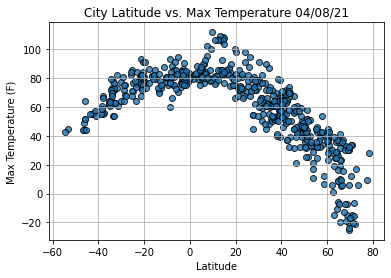

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

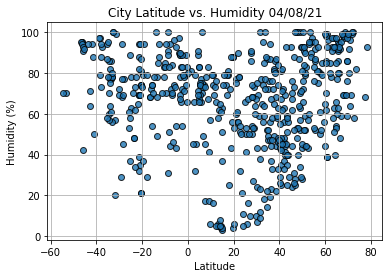

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

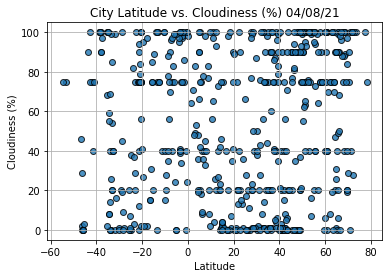

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

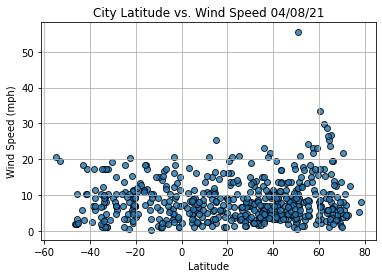

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [93]:
#IMPORT linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r="r= "+str (round(r_value,3))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [94]:
index13 = city_data_df.loc[13]
index13

City                 Longyearbyen
Country                        SJ
Date          2021-04-08 15:21:48
Lat                       78.2186
Lng                       15.6401
Max Temp                     28.4
Humidity                       93
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [95]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
541     True
542     True
543     True
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [96]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Banda Aceh,ID,2021-04-08 15:21:44,5.5577,95.3222,80.51,77,18,2.98
3,Victoria,HK,2021-04-08 15:20:45,22.2855,114.1577,73.99,78,100,4.00
4,Fortuna,US,2021-04-08 15:21:46,40.5982,-124.1573,46.00,81,20,3.44
7,Toktogul,KG,2021-04-08 15:21:47,41.8708,72.9402,50.07,56,15,3.49
9,Jamestown,US,2021-04-08 15:21:47,42.0970,-79.2353,72.00,46,1,9.22


In [97]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

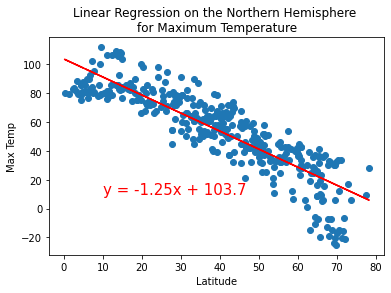

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,10))


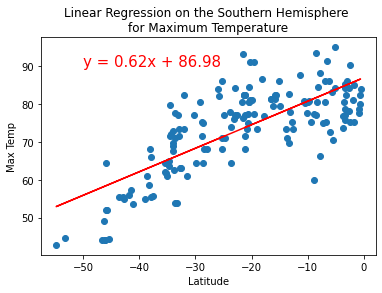

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))


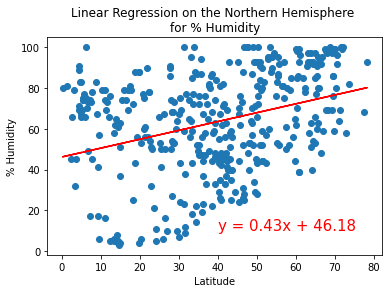

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))


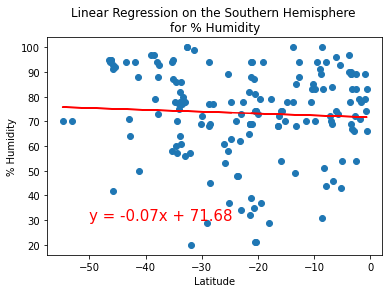

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,30))

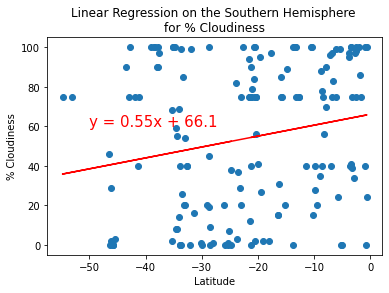

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

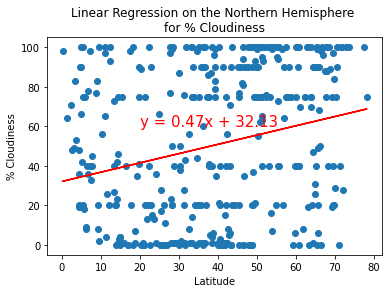

In [115]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(20,60))

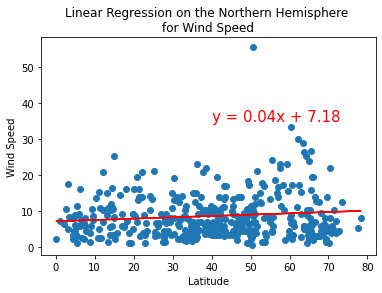

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

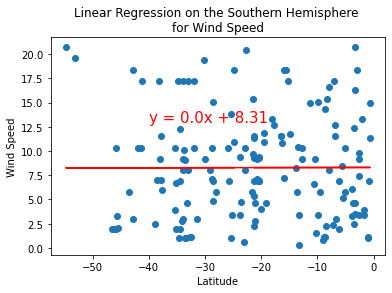

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-40,13))